In [2]:
import pymongo

In [3]:
from pymongo import MongoClient
client = MongoClient()

In [4]:
# Se connecter en local

client = MongoClient('localhost', 27017)

In [5]:
# Liste des databases presentes

client.list_database_names()

['Rohida_Armies', 'admin', 'config', 'local', 'rawDB']

In [6]:
# Se connecter sur la database

rawData = client.rawDB

In [7]:
# Montrer les collections de la database

rawData.list_collection_names() 

['products']

In [8]:
rawCollection = rawData['products']

In [8]:
# Afficher un document

import pprint

pprint.pprint(rawCollection.find_one())

{'_id': None,
 '_keywords': [],
 'additives_tags': [],
 'categories_hierarchy': [],
 'categories_tags': [],
 'category_properties': {},
 'checkers': [],
 'checkers_tags': [],
 'ciqual_food_name_tags': ['unknown'],
 'code': '',
 'complete': 0,
 'correctors': [],
 'correctors_tags': [],
 'creator': 'nounours',
 'informers': [],
 'informers_tags': ['nounours'],
 'ingredients_from_palm_oil_tags': [],
 'ingredients_tags': [],
 'ingredients_that_may_be_from_palm_oil_tags': [],
 'labels_hierarchy': [],
 'labels_tags': [],
 'nutriments': {},
 'nutrition_data_per': '100g',
 'photographers': [],
 'photographers_tags': ['nounours', 'stephane'],
 'pnns_groups_1': 'unknown',
 'pnns_groups_1_tags': ['unknown', 'missing-category'],
 'pnns_groups_2': 'unknown',
 'pnns_groups_2_tags': ['unknown', 'missing-category'],
 'popularity_key': 0,
 'serving_quantity': '0',
 'sortkey': 0.0,
 'states': 'en:to-be-completed, en:nutrition-facts-to-be-completed, '
           'en:ingredients-to-be-completed, '
       

In [14]:
rawCollection.estimated_document_count()

1601557

In [12]:
rawCollection.count_documents({'ecoscore_data.missing.origins':1})

732597

In [15]:
rawCollection.count_documents({'countries':'France'})

425015

In [8]:
rawCollection.count_documents({'purchase_places': 'France'})

40606

In [39]:
rawCollection.count_documents({'countries': 'France', 'manufacturing_places': { "$exists": True} })

193747

In [40]:
rawCollection.count_documents({'countries': 'France', 'ecoscore_data.adjustments.packaging.origins_of_ingredients': { "$exists": True}})

0

In [41]:
rawCollection.count_documents({'countries': 'France', 'ecoscore_data.adjustments.packaging.origins_of_ingredients': { "$exists": True},  'manufacturing_places': { "$exists": True}})

0

In [44]:
dataFr = 425015
dataManufactureFr = 193747
print("Il y a %s produits vendus en France, dont %s dont on connait le lieu de manufacture, soit %s pourcent." %(dataFr, dataManufactureFr, dataManufactureFr/dataFr*100))

Il y a 425015 produits vendus en France, dont 193747 dont on connait le lieu de manufacture, soit 45.585920496923634 pourcent.


In [46]:
rawCollection.find_one({'product_name_fr': 'Nutella'})

{'_id': '0062020000316',
 'origins_hierarchy': [],
 'nutrition_score_warning_fruits_vegetables_nuts_estimate': 1,
 'languages_hierarchy': ['en:english', 'en:french'],
 'allergens_hierarchy': ['en:milk', 'en:nuts', 'en:soybeans'],
 'ingredients_n': 8,
 'link': '',
 'product_name': 'Nutella',
 'unknown_ingredients_n': 0,
 'data_quality_tags': ['en:ingredients-percent-analysis-ok'],
 'nutriments': {'sodium_100g': 0,
  'fruits-vegetables-nuts-estimate_100g': 13,
  'saturated-fat_100g': 10,
  'fruits-vegetables-nuts-estimate': 13,
  'fruits-vegetables-nuts-estimate_label': '0',
  'fruits-vegetables-nuts-estimate-from-ingredients_100g': 0,
  'energy_value': 526,
  'sodium_value': 0,
  'fiber_100g': 0.05,
  'sugars_value': 58,
  'sodium': 0,
  'fat_unit': 'g',
  'salt_value': 0,
  'energy_unit': 'kcal',
  'sugars_100g': 58,
  'sugars_unit': 'g',
  'saturated-fat': 10,
  'energy-kcal_value': 526,
  'proteins_value': 0.05,
  'proteins_100g': 0.05,
  'saturated-fat_unit': 'g',
  'proteins': 0.05

In [12]:
rawCollection.find_one({'countries':'France',"image_url":{ "$exists": True}},
                       {"ingredients.text":1,
                        "ingredients.vegan":1,
                        "ingredients.vegetarian":1,
                        "ecoscore_data.agribalyse.name_fr":1,
                        "code":1,
                        "countries":1,
                        "nutriscore_grade":1,
                        "categories":1,
                        "ecoscore_grade":1,
                        "product_name_fr":1,
                        "image_url":1,
                        "image_small_url":1
                       })

In [19]:
rawCollection.find_one({'countries':'France'})

{'_id': 30383354190402,
 'carbon_footprint_percent_of_known_ingredients': 7,
 'countries_tags': ['en:france'],
 'product_name_fr': 'basilic',
 'categories_lc': 'fr',
 'obsolete': '',
 'allergens_from_ingredients': '',
 'vitamins_tags': [],
 'traces_lc': 'fr',
 'labels': 'Nutriscore,Nutriscore A',
 'ingredients': [{'id': 'fr:Pulpe de tomates fraîches avec morceaux et purées de tomates fraîches',
   'percent_min': 85.0,
   'percent': 85,
   'percent_max': 85.0,
   'rank': 1,
   'text': 'Pulpe de tomates fraîches avec morceaux et purées de tomates fraîches',
   'percent_estimate': 85.0},
  {'text': 'légumes frais',
   'vegan': 'yes',
   'has_sub_ingredients': 'yes',
   'ingredients': [{'percent_min': 3.5,
     'id': 'en:onion',
     'percent_max': 7.0,
     'text': 'oignons',
     'percent_estimate': 5.25},
    {'id': 'en:carrot',
     'percent_min': 0.0,
     'percent_max': 3.5,
     'percent_estimate': 1.75,
     'text': 'carottes'}],
   'percent_max': 7.0,
   'id': 'fr:legumes-frais',


In [53]:
import pandas as pd

cursor = rawCollection.find({'countries':'France'},
                       {"ingredients.text":1,
                        "ingredients.vegan":1,
                        "ingredients.vegetarian":1,
                        "ecoscore_data.agribalyse.name_fr":1,
                        "code":1,
                        "countries":1,
                        "nutriscore_grade":1,
                        "categories":1,
                        "ecoscore_grade":1,
                        "product_name_fr":1,
                        "product_name":1,
                        "generic_name_fr":1,
                        "generic_name":1,
                       })

produits_df = pd.DataFrame(list(cursor))
print(produits_df.head())

              _id       product_name_fr  \
0  30383354190402               basilic   
1              00             lignaform   
2           00000  Galette Bretonne bio   
3   0000000000017      Vitória crackers   
4   0000000000031                 Cacao   

                                         ingredients  \
0  [{'text': 'Pulpe de tomates fraîches avec morc...   
1  [{'text': 'Farine de blé', 'vegan': 'yes', 've...   
2                                                 []   
3                                                 []   
4                                                 []   

                                       ecoscore_data            code  \
0  {'agribalyse': {'name_fr': 'Sauce tomate aux o...  30383354190402   
1                                                NaN              00   
2                                 {'agribalyse': {}}           00000   
3                                 {'agribalyse': {}}   0000000000017   
4                                 {'agribaly

In [13]:
import pandas as pd

cursor = rawCollection.find({'countries':'France', 'manufacturing_places': { "$exists": True}},
                       {#"ingredients.text":1,
                        #"ingredients.vegan":1,
                        #"ingredients.vegetarian":1,
                        #"ecoscore_data.agribalyse.name_fr":1,
                        "code":1,
                        #"countries":1,
                        #"nutriscore_grade":1,
                        #"nutriscore_score":1,
                        #"categories":1,
                        #"ecoscore_grade":1,
                        #"ecoscore_score":1,
                        #"product_name_fr":1,
                        #"product_name":1,
                        #"generic_name_fr":1,
                        #"generic_name":1,
                        #"manufacturing_places":1,
                        "brands":1
                       })

main_df = pd.DataFrame(list(cursor))

# Verification du rendu du tableau
print(main_df.head())

              _id            code              brands
0  30383354190402  30383354190402             panzani
1              00              00           lignaform
2   0000000000100   0000000000100       courte paille
3   0000000001199   0000000001199               CROUS
4   0000000001281   0000000001281  Crous Resto',Crous


In [48]:
number = 0
for i in range(len(main_df)):
    if main_df.loc[i, 'brands'] in ['Carrefour ']:
        number +=1
print(number)

0


## *Beaux Graphes d'exploration* ##


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

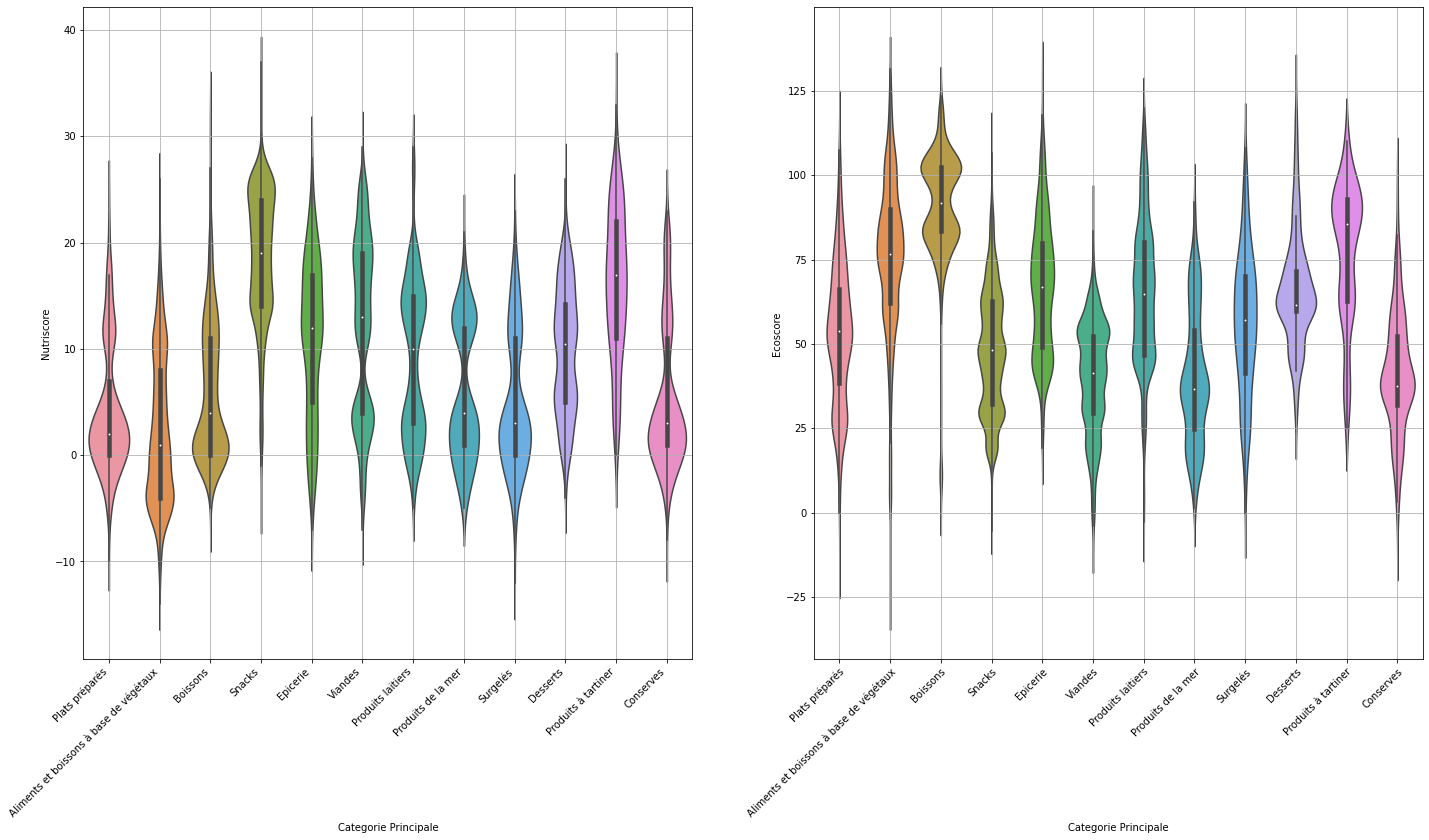

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24,12))
x = np.arange(len(data_df['Categorie Principale']))

plot1 = sns.violinplot(x = 'Categorie Principale', y = 'Nutriscore', data = data_df, split = True, ax = ax1, inner = 'box')
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.grid()


plot2 = sns.violinplot(x = 'Categorie Principale', y = 'Ecoscore', data = data_df, split = True, ax = ax2, inner = 'box')
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.grid()


plt.xticks(rotation = 45, rotation_mode='anchor', ha='right')

Text(0.5, 0.98, "Recherche de correlation entre le Nutriscore et l'Ecoscore")

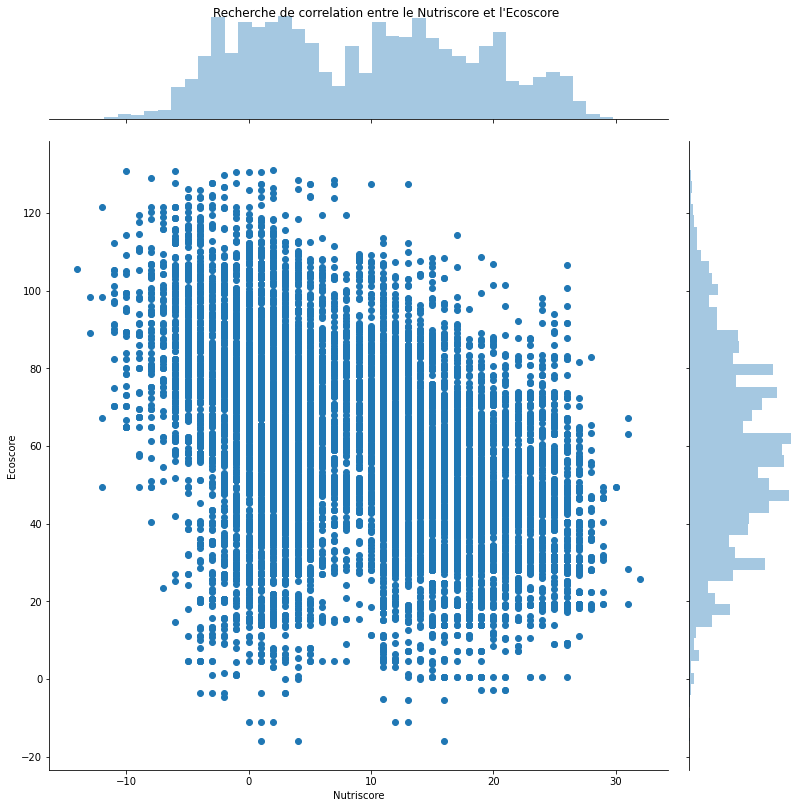

In [9]:
plot = sns.jointplot(x = 'Nutriscore', y = 'Ecoscore', data = data_df)
plot.fig.set_size_inches((12,12))
plot.fig.suptitle("Recherche de correlation entre le Nutriscore et l'Ecoscore")

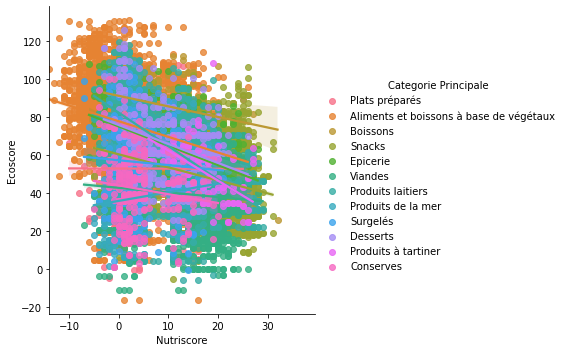

In [10]:
sns.lmplot(x ='Nutriscore', y ='Ecoscore', data = data_df, hue ='Categorie Principale')
#, scatter_kws ={'s':100}, palette ='plasma'